<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/DIST_TRIANGULAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformada Inversa: Distribución Triangular**
*Vilchis García Karla Ivonne*


---


Sean:
1. a: valor mínimo
2. b: valor pico
3. c: valor máximo

$$f(x )=\begin{cases}
\frac{2(x-a)}{(c-a )(b-a )} & si & a\leq x \leq b\\
\frac{2(x-c )}{(c-a )(c-b)} & si & b < x \leq c\\
\end{cases}$$

Dada la función de distribución de probabilidad *(f(x))* anterior que define al triangulo

        1. calculamos la Función de distribución acumulada *(F(x))* de la siguiente manera:



$$F(x)=\int_{-∞}^∞ f(t)dt$$

         Obtenemos

$$F(x )=\begin{cases}
\frac{(x-a)^2}{(c-a )(b-a )} & si & a\leq x \leq b\\
1-\frac{(c-x)^2}{(c-a )(c-b)} & si & b < x \leq c\\
\end{cases}$$

         2. Suponer un número aleatorio
         
$$R \sim U(0,1)$$

         3. Resolvemos
$$F(x)=R$$

         4. Obtenemos
$$x=F^{-1}(R)$$

En nuestro caso

$$x=\begin{cases} \sqrt{R(c-a)(b-a)}+a & si & R<\frac{b-a}{c-a}\\
\\
c-\sqrt{(1-R)(c-a)(c-b)} & si & R\geq \frac{b-a}{c-a}
\end{cases}$$

In [15]:
#llamamos a las paqueterías correspondientes
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#definimos nuestra función inversa
def exp(a,b,c,n ):
    x=[]#lista vacía para almacenar las x calculadas
    for i in range(n):#iniciamos ciclo para repetir el proceso n veces
       R = random.random()#generamos el número aleatorio
       xi = np.sqrt(R*(c-a)*(b-a))+a #operación del primer valor de x
       if a <= xi <= b: # definimos el condicional
          x.append(xi) # si cumple las condiciones se almacena en la lista
       else:# sino las cumple pasamos a clcular el otro valor de x
         xi = c-np.sqrt((1-R )*(c-a )*(c-b ))
         x.append(xi)
    return x #regresa la lista de los n valores de x calculados

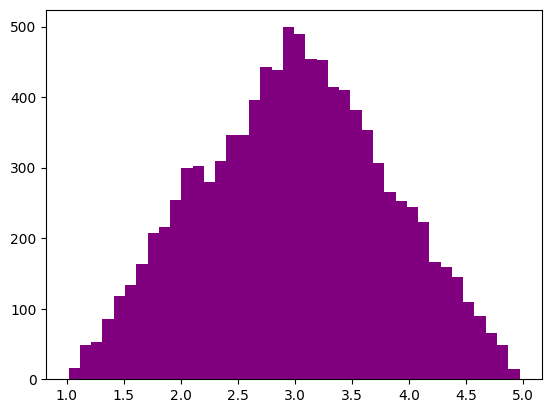

In [18]:
#definimos los parámetros iniciales
a=1
b=3
c=5
#las veces que se repetirá el experimento
n=10000
#asignamos una variable al experimento
h =exp(a,b,c,n)
#graficamos nuestra función de distribución Triangular
plt.hist(h, bins=40, color="purple")
plt.show()

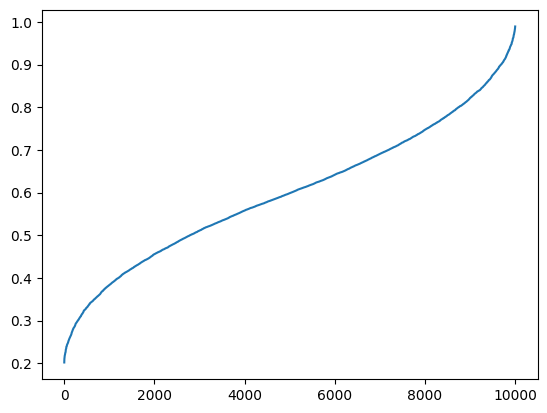

In [5]:
#distribución acumulada
i = np.sort([ k/c for k in h ]) #ordenamos los valores de x
#graficamos los valores ordenados para visualizar la distribución acumulada
plt.plot(i)
plt.show()

In [19]:
#imprimimos la media, varianza y desviación estándar del experimento
print("media:",np.mean(h))
print("varianza",np.var(h))
print("desviación estándar",np.std(h))

media: 2.992999887059427
varianza 0.6639575126543998
desviación estándar 0.8148358808093811


## **resultados teóricos**
para la media ocupamos
$$E[x]=\int_0^2f(x)xdx$$

para la varianza:
$$var[x]=E[x^2]-E[x]^2$$

In [17]:
#importamos sympy para la variable simbolica x
import sympy as sp
x = sp.Symbol('x')

#calculamos la media con la formula de valor esperado  y nuestra integral
#queda en dos partes (int 1 de 1 a 3) e (int2 de 3 a 5)
y1 =(2*x*(x-a)) / ((b-a)*(c-a))
int1=sp.integrate(y1,(x,1,3))

y2 = (2*x*(x-c)) / ((c-a)*(b-c))
int2=sp.integrate(y2,(x,3,5))

E=int1+int2
print("media:", E)
#calculamos las integrales para poder calcular la varianza
y3 = (2*(x**2)*(x-a)) / ((b-a)*(c-a))
int3=sp.integrate(y3,(x,1,3))

y4 = (2*(x**2)*(x-c)) / ((c-a)*(b-c))
int4=sp.integrate(y4,(x,3,5))

v = int3+int4
var = v-E**2
print("varianza:", var)

ds = math.sqrt(var)
print("desviación estandar:", ds)

media: 3
varianza: 2/3
desviación estandar: 0.816496580927726
